# Click Click Photography Image Classification

Whats left to do:
* Write-up
* Presentation
* Document/comment code
* Depending on prediction-score classify the image into a folder automatically
* Interaction for user for deciding which group the image should go in
* Other/better model than resnet50!!
* Doing oversampling in prepare_data class - But doesn't seem to work too well... Better suggestions?
* A lot of parameters are still hardcoded in the classes. Maybe move them to the calls in this notebook?
* ...

## Setup

### Libraries

In [1]:
# DS Tools
import numpy as np
import pandas as pd
import os
from glob import glob
import itertools
from collections import Counter
from timeit import default_timer as timer
import tqdm


# Visualizations
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
plt.rcParams['font.size'] = 14

# Image manipulations
from PIL import Image

# Splitting
from sklearn.model_selection import train_test_split

# Neural Networks
import torch
from torch import Tensor, nn, optim, cuda
import torch.nn as nn
from torch.nn.functional import interpolate
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
#from torchsummary import summary
from torch.utils.data import DataLoader, sampler

# Error handling
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### User defined functions and classes

In [2]:
from src.prepare_data import prepare_data
from src.nn_class import nn_class

### Constants

In [3]:
# Where the input images are located
PATH = f"images_final/"

# Directories for model
traindir = f"data/train"
validdir = f"data/val"
testdir = f"data/test"

### Prepare data for the model
This step takes the given input data, splits between train/test/validation. For the training step, it also oversamples, in order to combat class imbalanced.
Doesn't return anything, but sets up the images in the correct folder, oversampled

In [4]:
prepare_data(PATH, traindir, validdir, testdir, do_oversampling = True, oversampling = 3)

## Neural network model
Load model (and/or train)
Might need to disable load_checkpoint() two cells down if running for the first time

In [5]:
nnc = nn_class(batch_size = 128, traindir=traindir, validdir=validdir, testdir=testdir)

Train on gpu: True
1 gpus detected.
True False
There are 5 different classes.


### Choose a model 
Currently only resnet work, but I suspect it is trivial to get the remaining two up and running. I __THINK__ only `set_model` needs to be fixed.

Choose one, and let the remaining be commented out.

_(Also comment out `load_checkpoint` if this is your first time running for that model)_

In [6]:
#nnc.set_model('resnet50', describe_model=False) # Set to true to see which model we built
nnc.set_model('resnet18', describe_model=False) # Set to true to see which model we built
#nnc.set_model('wide_resnet50_2', describe_model=False) # Set to true to see which model we built

# These ones don't work (yet?) - But suspect they are promising, IFF we get them up
#nnc.set_model('vgg16', describe_model=False) # Set to true to see which model we built
#nnc.set_model('alexnet', describe_model=False) # Set to true to see which model we built


nnc.load_checkpoint()

In [7]:
nnc.run_train(early_stopping = 5, n_epochs = 30)
nnc.save_checkpoint()

Starting Training from Scratch.

Epoch: 0	100.00% complete. 2.80 seconds elapsed in epoch.
Epoch: 0 	Training Loss: 1.5002 	Validation Loss: 1.4261
		Training Accuracy: 34.74%	 Validation Accuracy: 39.50%
Epoch: 1	100.00% complete. 3.73 seconds elapsed in epoch.
Epoch: 1 	Training Loss: 1.4338 	Validation Loss: 1.4125
		Training Accuracy: 38.24%	 Validation Accuracy: 39.08%
Epoch: 2	100.00% complete. 2.73 seconds elapsed in epoch.
Epoch: 2 	Training Loss: 1.4106 	Validation Loss: 1.3832
		Training Accuracy: 40.82%	 Validation Accuracy: 40.89%
Epoch: 3	100.00% complete. 2.74 seconds elapsed in epoch.
Epoch: 3 	Training Loss: 1.3887 	Validation Loss: 1.3721
		Training Accuracy: 41.26%	 Validation Accuracy: 42.84%
Epoch: 4	100.00% complete. 3.75 seconds elapsed in epoch.
Epoch: 4 	Training Loss: 1.3684 	Validation Loss: 1.3753
		Training Accuracy: 43.75%	 Validation Accuracy: 42.84%
Epoch: 5	100.00% complete. 2.66 seconds elapsed in epoch.
Epoch: 5 	Training Loss: 1.3646 	Validation Loss:

### See how the training performs

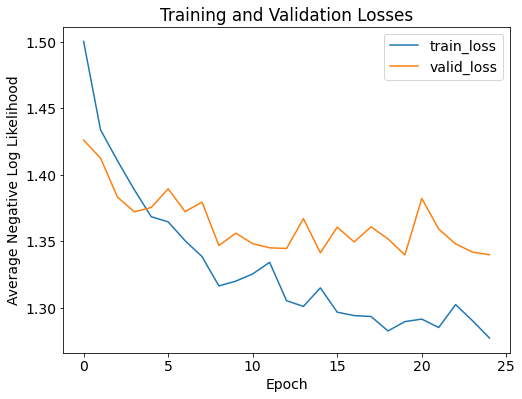

In [8]:
nnc.plot_history()

## predict

### Draw a random prediction

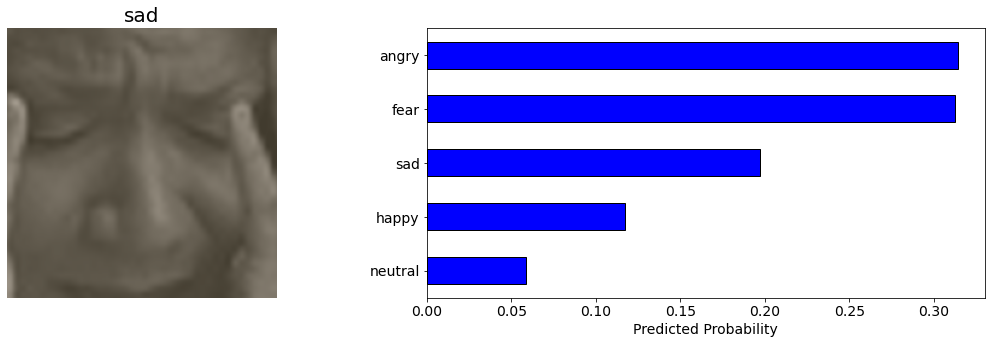

In [9]:
nnc.display_prediction(nnc.random_test_image(), topk=5)

### Predict from imagepath
This is a starting point for the actual task... Currently drawing a random sample of 10

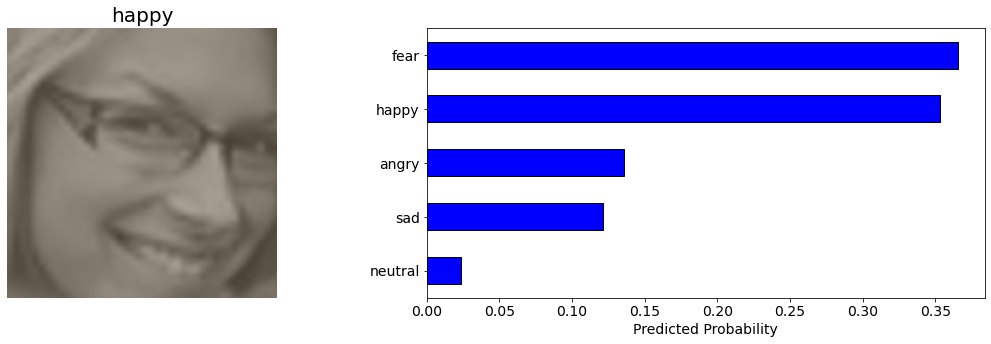

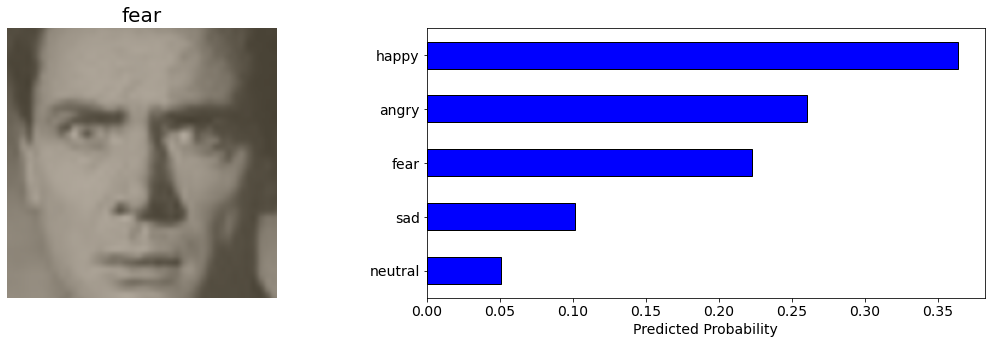

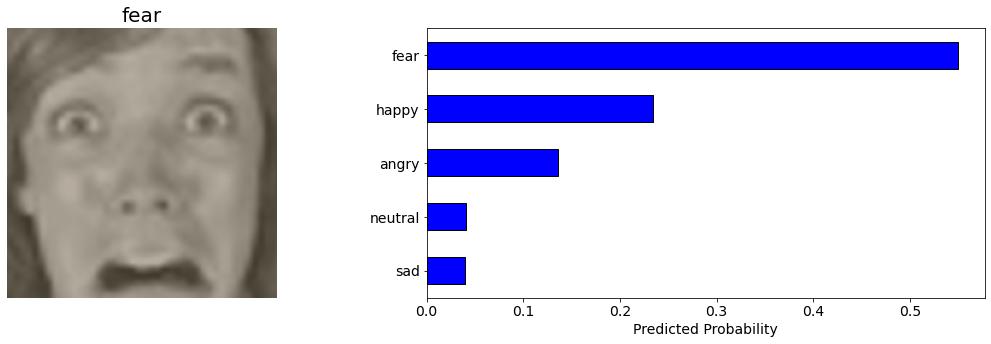

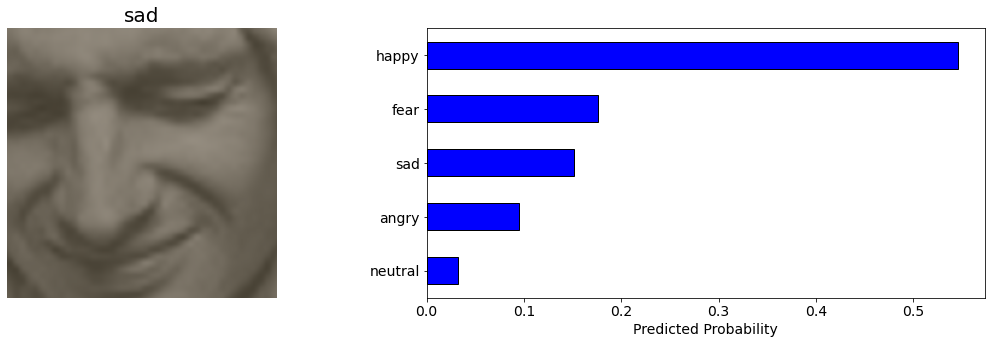

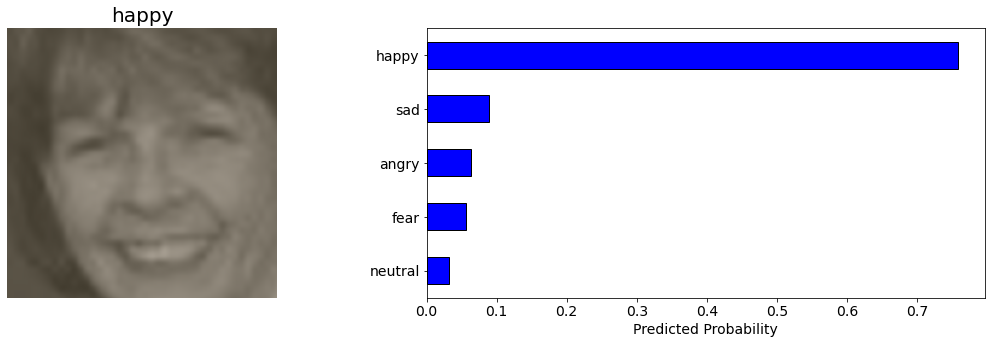

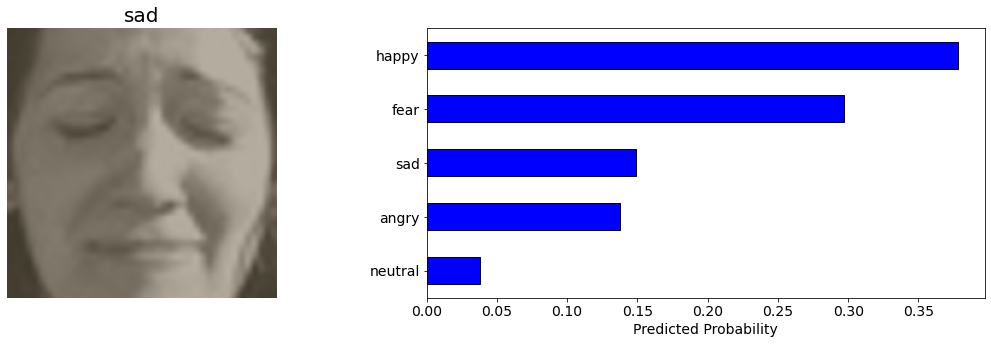

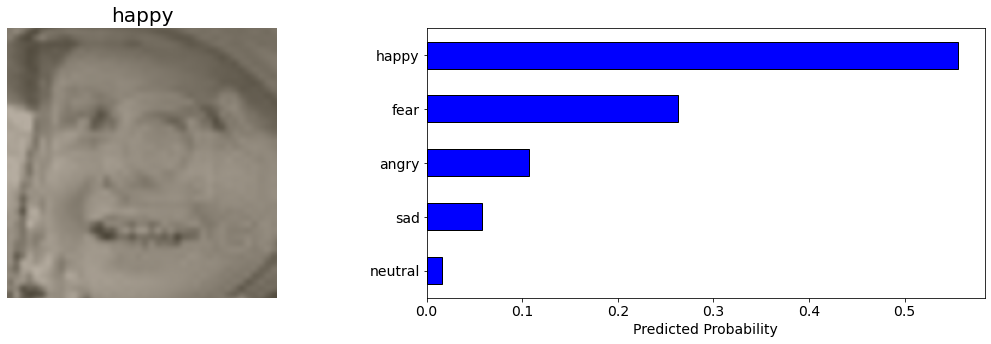

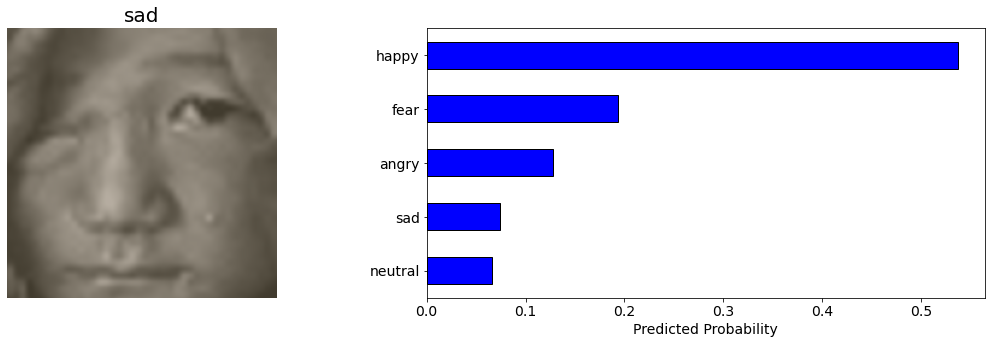

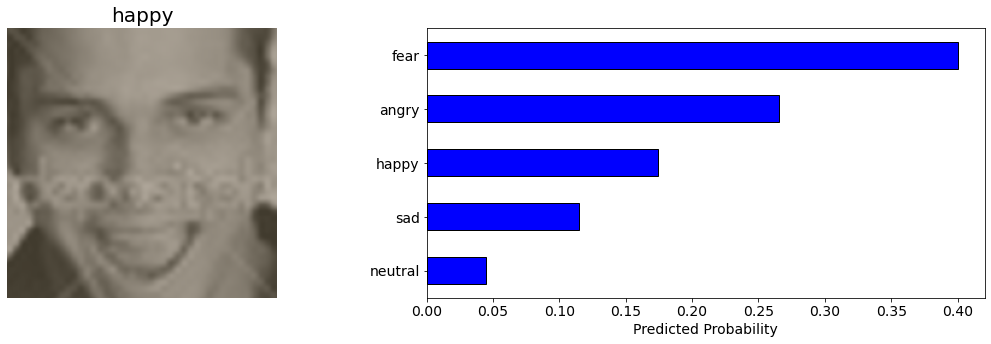

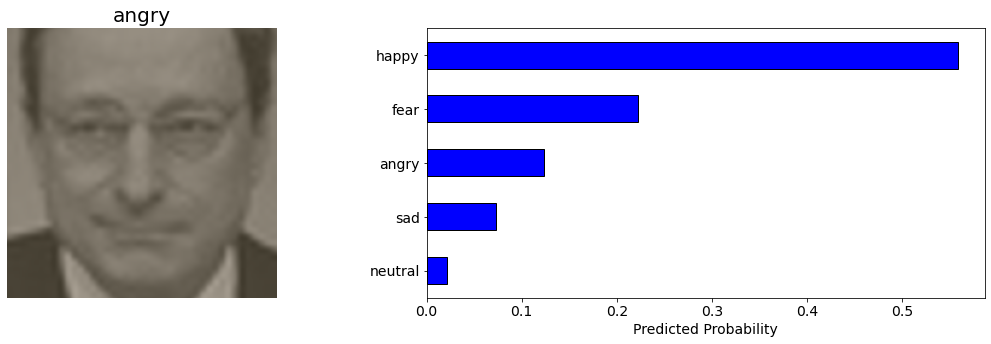

In [10]:
for i in range(10):
    root = testdir +"/"+ np.random.choice(nnc.get_categories()) + '/'
    img_path = root + np.random.choice(os.listdir(root))
    nnc.display_prediction(img_path, topk=5)